# **Investigate a Dataset: Titanic Data Analysis**
   
      by *Rahul Patra* (21st May, 2017)

# **1. Introduction : **

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. The following data analysis is done on the titanic data about the passenger provided by kaggle which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. This will consist of stating few questions and addressing them in the rest of the analysis process.

# **2. About The Dataset :**

The variables included in the dataset are:
1. survival        Survival
                (0 = No; 1 = Yes)
2. pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name            Name
4. sex             Sex
5. age             Age
6. sibsp           Number of Siblings/Spouses Aboard
7. parch           Number of Parents/Children Aboard
8. ticket          Ticket Number
9. fare            Passenger Fare
10. cabin           Cabin
11. embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

*SOME SPECIAL NOTES:*
 - Pclass is a proxy for socio-economic status (SES)
   1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

 - Age is in Years; Fractional if Age less than One (1)
   If the Age is Estimated, it is in the form xx.5

 - With respect to the family relation variables (i.e. sibsp and parch)
   some relations were ignored.  The following are the definitions used
   for sibsp and parch.

    - Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    - Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    - Parent:   Mother or Father of Passenger Aboard Titanic
    - Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

 - Other family relatives excluded from this study include cousins,
   nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
    only with a nanny, therefore parch=0 for them.  
    As well, some travelled with very close friends or neighbors in a village, however,
    the definitions do not support such relations.
    
    **data info taken from [kaggle](https://www.kaggle.com/c/titanic/data) **

# *Current Condition of Titanic* 

In [2]:
from IPython.display import Image
Image(url="http://www.sanathaber.net/img/blog/titanik_16.10.2016_a95e26f.jpg")

# **3. Analysis of Titanic Data : **

   ### 3.1. Questions Need to be Answered :

     In this analysis where are going to answer some questions and visualize them. The questions are as follows :
     Who were the people on board?
   - How did fares differ between men and women?
   - Who survived?
   - Who did not survive and why?
   - Comparation of survivors by class and gender.
   - What are the survival rates for men, woman and children? or What is the best age for survive?
   - It's true in this case the phrase 'women and children first'?
   - Is our assumption that more rich people survived correct or not? i.e. Had first class passengers more chances of survive?

### ** 3.2. Loading  Data: **

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
import seaborn as sns
import scipy.stats as sp

titanic_df = pd.read_csv("titanic_data.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.3. ** Data Wrangling / Cleaning : **
         Now to answer the questions we won't need all the given fields so for cleaning and preparing the data we are going to take just Survived, Name, Pclass, Sex, Age, SibSp, Fare, Parch, Cabin.

In [2]:
titanic_df = titanic_df[["Survived", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch","Cabin", "Fare"]]
titanic_df.describe(include="all")

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,Cabin,Fare
count,891.000000,891,891.000000,891,714.000000,891.000000,891.000000,204,891.000000
unique,NaN,891,NaN,2,NaN,NaN,NaN,147,NaN
top,NaN,"Graham, Mr. George Edward",NaN,male,NaN,NaN,NaN,C23 C25 C27,NaN
freq,NaN,1,NaN,577,NaN,NaN,NaN,4,NaN
mean,0.383838,NaN,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208
std,0.486592,NaN,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429
min,0.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000
25%,0.000000,NaN,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400
50%,0.000000,NaN,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200
75%,1.000000,NaN,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000


In [3]:
print titanic_df["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64


Five of the seven selected field are numeric so the describe function shows a better summary of them. We can't see anything strange except some missing values in the age field (714/891). So the main problem resides in the missing values of the age field. In this case we decided to made a listwise deletion because it doesn't make sense to impute the ages neither with the average or using linear regression.

In [4]:
titanic_df = titanic_df[titanic_df["Age"].notnull()]
len(titanic_df)

714

#### **3.3.1. A comparison of overall fare prices between men and women :** 

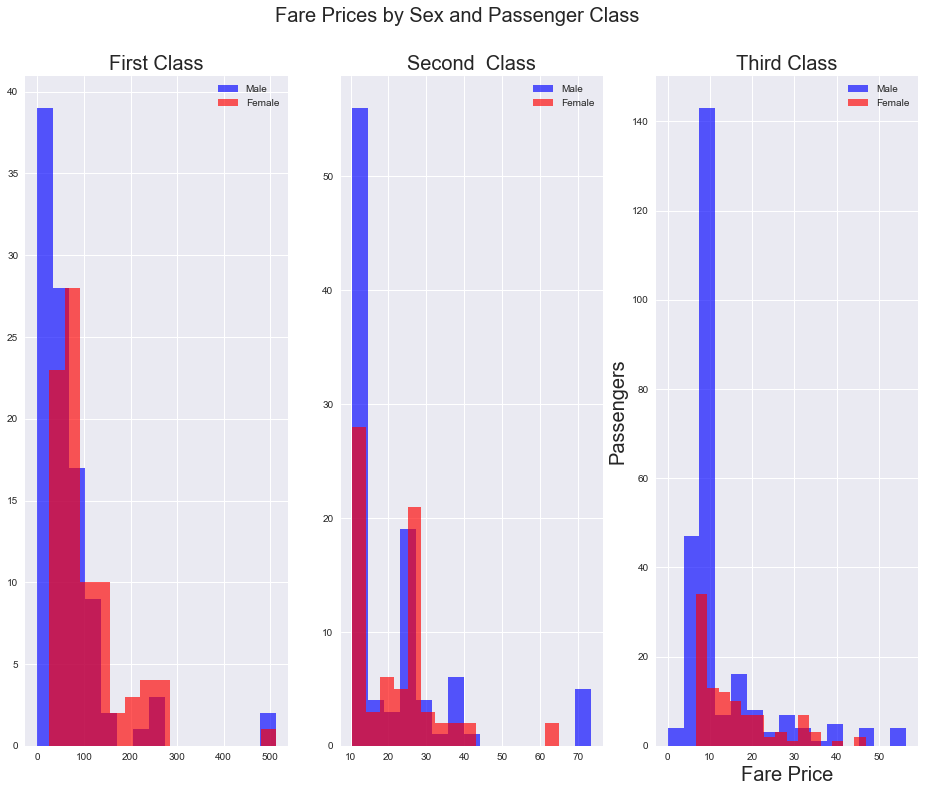

Mean first class male fare: 71.142781
Mean first class female fare: 107.946275
Mean second class male fare: 21.113131
Mean second classfemale fare: 21.951070
Mean third class male fare: 12.162695
Mean third class female fare: 15.875369


In [43]:
fares = titanic_df[pd.notnull(titanic_df['Fare'])]
p1 = fares[fares.Pclass == 1]
p2 = fares[fares.Pclass == 2]
p3 = fares[fares.Pclass == 3]

bins = 15
n_bins = 25

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 12))
ax0, ax1, ax2 = axes.flat
fig.subplots_adjust(top=0.9)


fig.suptitle('Fare Prices by Sex and Passenger Class', fontsize=20)
plt.xlabel('Fare Price', fontsize=20)
plt.ylabel('Passengers', fontsize=20)

ax0.hist(p1[p1.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.65, label='Male')
ax0.hist(p1[p1.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.65, label='Female')
ax0.legend(prop={'size': 10})
ax0.set_title('First Class', fontsize=20)

ax1.hist(p2[p2.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.65, label='Male')
ax1.hist(p2[p2.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.65, label='Female')
ax1.legend(prop={'size': 10})
ax1.set_title('Second  Class', fontsize=20)

ax2.hist(p3[p3.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.65, label='Male')
ax2.hist(p3[p3.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.65, label='Female')
ax2.legend(prop={'size': 10})
ax2.set_title('Third Class', fontsize=20)

plt.show()

# fare by pclass & sex means
print "Mean first class male fare: %f" % p1[p1.Sex == 'male'].Fare.mean()
print "Mean first class female fare: %f" % p1[p1.Sex == 'female'].Fare.mean()

print "Mean second class male fare: %f" % p2[p2.Sex == 'male'].Fare.mean()
print "Mean second classfemale fare: %f" % p2[p2.Sex == 'female'].Fare.mean()

print "Mean third class male fare: %f" % p3[p3.Sex == 'male'].Fare.mean()
print "Mean third class female fare: %f" % p3[p3.Sex == 'female'].Fare.mean()



This shows that average fare prices are higher for women across all passenger classes. However, the biggest difference in fare prices comes in first class, followed by third class.

#### **3.3.2. First we'll have a look at the differences in survival rates between classes. We will first do a statistical test to check for a correlation between the categorical variables of survived and pclass. For this we use the chi-squared test on the frequency table survived per class.**

In [5]:
survived_class = pd.crosstab(titanic_df.Pclass, titanic_df.Survived.astype(bool))
chi2,pval,dof,expected = sp.chi2_contingency(survived_class)

print(survived_class)
print("Chi squared test",chi2)
print("p-value: ",pval)

Survived  False  True 
Pclass                
1            64    122
2            90     83
3           270     85
('Chi squared test', 92.901417211433213)
('p-value: ', 6.7098617497569091e-21)


**3.3.3. First class passengers have more survivors than deceased while third class passenger have way more non-survivors than survivors. For firstclass passengers 62.96% survived while only 24.24% of the third class passengers survived. So indeed the data shows what is stated.**

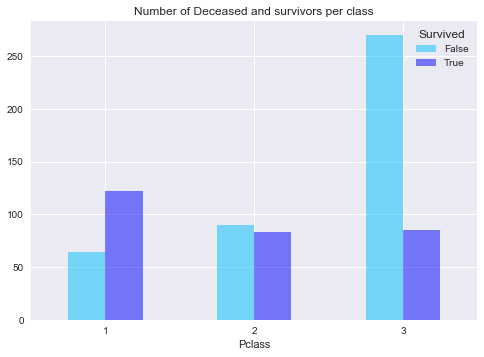

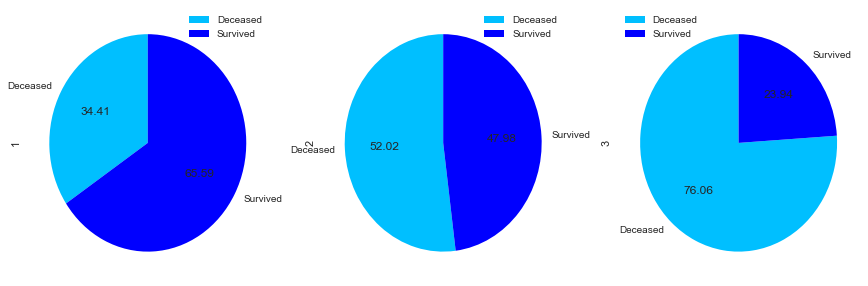

In [25]:
survived_class.plot(kind='bar', rot=0, color=['#00bfff','#0000ff'], alpha=0.5, title="Number of Deceased and survivors per class");
transposed_survived_class = survived_class.transpose()
transposed_survived_class.plot(labels=['Deceased', 'Survived'], colors=['#00bfff', '#0000ff'], kind='pie', subplots='True', rot=1, autopct='%.2f', startangle=90, figsize=[15,5]);

In [45]:
survived_sex = pd.crosstab(titanic_df.Sex, titanic_df.Survived.astype(bool));
chi2,pval,dof,expected = sp.chi2_contingency(survived_sex)

print(survived_sex)
print("Chi squared test",chi2)
print("p-value: ",pval)

Survived  False  True 
Sex                   
female       64    197
male        360     93
('Chi squared test', 205.02582752855906)
('p-value: ', 1.6716678441395297e-46)


*Conclusion : * Chi squared value is 102.889 with 2 degrees of freedom the chi-squared value should at least be 5.991 so this is statistically significant.

**3.3.4. Comparison of Survivors by Class and Gender : **


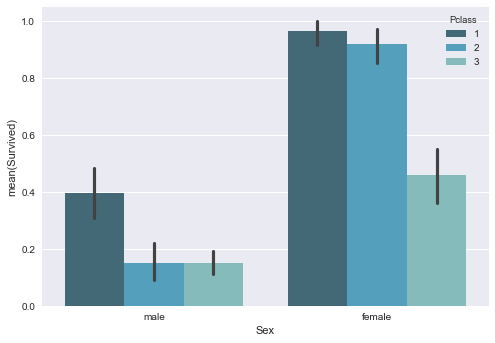

In [13]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Pclass", palette="GnBu_d")
sns.plt.show()

*Conclusion:* Survived women in first and second classes doubles the mean of third class. But in case of men, just the first class have difference in survived mean.

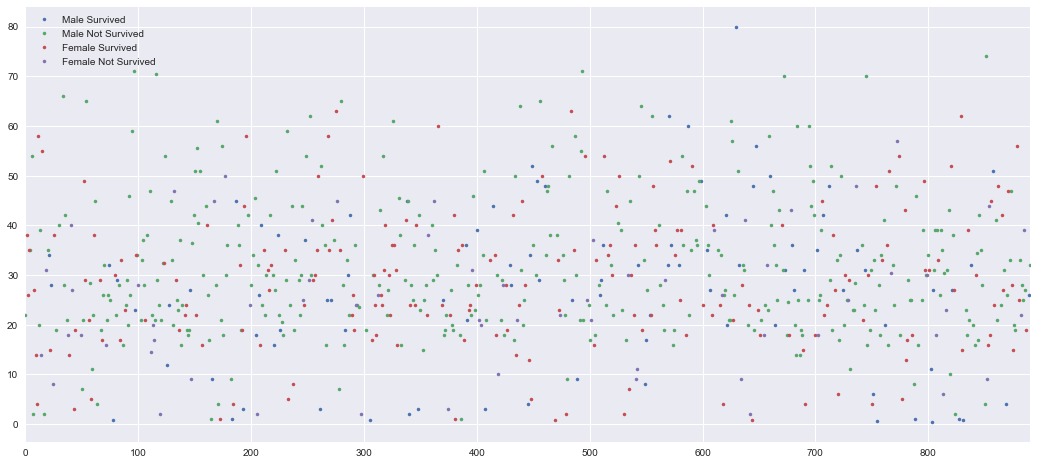

In [28]:
def getPeopleAge(sex, survived):
    return titanic_df[(titanic_df['Sex']==sex)&(pd.notnull(titanic_df['Age']))&(titanic_df['Survived']==survived)]['Age']
%matplotlib inline
titanic_df3 = pd.concat([getPeopleAge('male', 1), getPeopleAge('male', 0),
                     getPeopleAge('female', 1), getPeopleAge('female', 0)], 
                    axis=1, keys=['Male Survived','Male Not Survived', 
                                  'Female Survived','Female Not Survived'])
titanic_df3.plot(style=".", figsize=[18, 8]);

*Conclusion :* The plot gives a little idea that most of the Female survived. But still there are many female who didn't survive. The males above age of 65 didn't survive while all females above age of 65 survived. Let us explore further by dividing them into different class of people find a better pattern. First we plot just the male and then the females.

** 3.3.5. The easiest way to answer the fact "woman and children first" is to show a plot of how the survivors are distributed depending on age and sex.**

In [30]:
#To know if the passenger is a child or not, we're going to add a column IsChild with values 0 if age is greather than 18 and 1 if it's less than or equal 18

def Child(x):
    if x > 18:
        return 0
    else:
        return 1
titanic_df["Child"] = pd.Series(titanic_df["Age"].apply(Child), index=titanic_df.index)


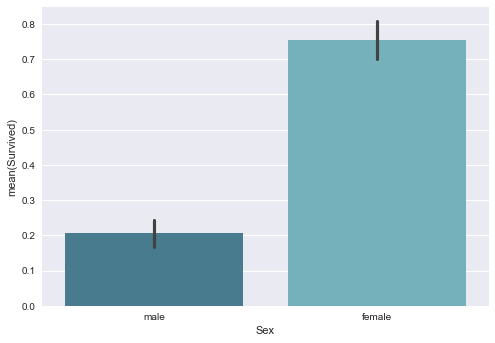

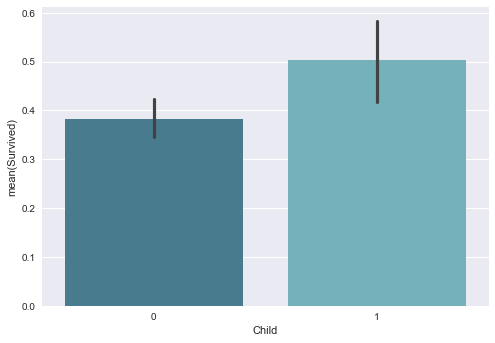

In [31]:
sns.set(style="darkgrid")
sns.barplot(data=titanic_df,x="Sex",y="Survived", palette="GnBu_d")
sns.plt.show()
sns.barplot(data=titanic_df,x="Child",y="Survived", palette="GnBu_d")
sns.plt.show()

*Conclusion:* The probability of survive is much bigger in women than in men and quite big in childs than in adults. So we can confirm in this case it was true that women and children first.

**3.3.6. Survival Rate and Best Age of Survival :**

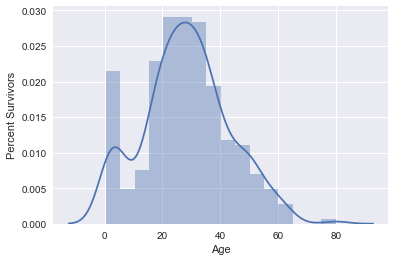

In [29]:
survivors_ages = titanic_df[titanic_df["Survived"] == 1]["Age"]
ax = sns.distplot(survivors_ages)
ax.set(xlabel='Age', ylabel='Percent Survivors')
sns.plt.show()

*Conclusion:* This plot is based on the people who survived. People from 20-40 age survived most.

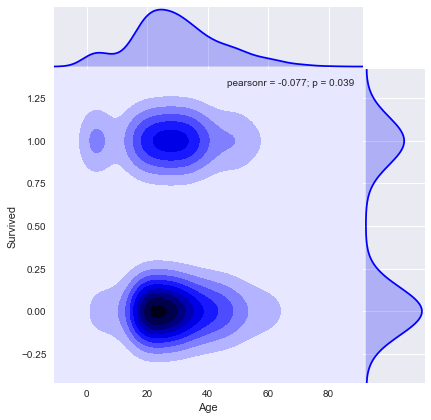

In [51]:
sns.jointplot("Age", "Survived", data=titanic_df,
                   kind="kde", space=0, color="b")
sns.plt.show()

*Conclusion:* People who didn't survive also from 20-40 age group.

**Percentage of Survivors for Each Age : **

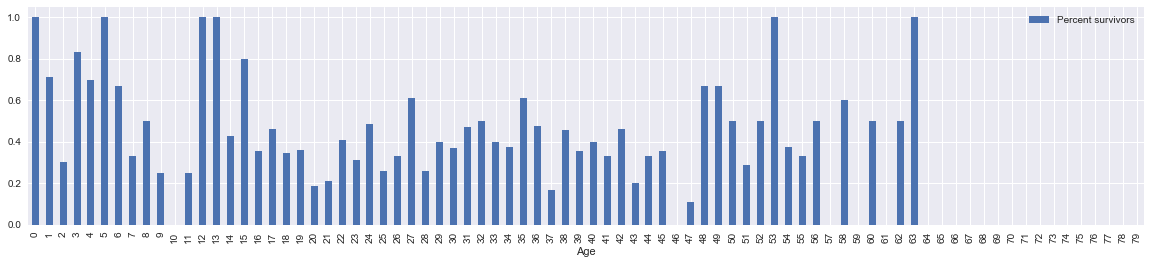

In [44]:
max_age = int(titanic_df["Age"].max())
age_dist = pd.DataFrame(index=xrange(max_age),columns=["Survived", "NotSurvived"])
age_dist = age_dist.fillna(0)
for age in age_dist.index:
    age_survive = titanic_df[titanic_df["Age"].astype(int) == age]["Survived"]
    age_dist.loc[age, "NotSurvived"] = sum(age_survive == 0)
    age_dist.loc[age, "Survived"] = sum(age_survive == 1)

survived_proportions = age_dist.Survived / age_dist.sum(axis="columns")
survived_proportions = survived_proportions.fillna(0)
survived_proportions.index.name = "Age"
survived_proportions.name = "Percent survivors"
survived_proportions.plot(kind="bar", figsize=(20,4),legend=True)

*Conclusion :* This plot shows the % of survived person by age. We can see that there are some ages with 100% of survivors. They are 0, 5, 12, 13, 53 and 63 years old.

**3.3.7. Finding the number of Male, Female, Child, Adults : **
 - Assumption Taken: There are significant differance between proportions.

In [47]:
male = titanic_df[titanic_df["Sex"]== "male"]
female = titanic_df[titanic_df["Sex"]== "female"]
total_people = len(male) + len(female)
print "total people :", total_people
print "males :", len(male)
print "females :", len(female)

total people : 714
males : 453
females : 261


Now we perform **two proportion Z test** 

In [48]:
import math
p_male = float(len(male[male["Survived"] == 1])) / len(male)
p_female = float(len(female[female["Survived"] == 1])) / len(female)
p = (p_male * len(male) + p_female * len(female)) / total_people
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(male) + float(1)/len(female) ))
print "SE : ", SE
z = (p_male - p_female) / SE
print "z :", z

p : 0.406162464986
SE :  0.0381648418165
z : -14.3978392843


here, 
- p= **Pooled Sample Proportion**
- z= **Total Statistic**
- SE= **Standard Error**

*Conclusion :* The p-value , z-value being small, we can reject the null hypothesis and say that in this scenario there is a significant difference between proportions.

Now, for Adults and Childs, we do the same:

In [49]:
child = titanic_df[titanic_df["Child"]== 1]
adult = titanic_df[titanic_df["Child"]== 0]
print "total people :", total_people
print "childs :", len(child)
print "adults :", len(adult)
p_child = float(len(child[child["Survived"] == 1])) / len(child)
p_adult = float(len(adult[adult["Survived"] == 1])) / len(adult)
p = (p_child * len(child) + p_adult * len(adult)) / total_people
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(child) + float(1)/len(adult) ))
print "SE : ", SE
z = (p_child - p_adult) / SE
print "z :", z

total people : 714
childs : 139
adults : 575
p : 0.406162464986
SE :  0.0464185423935
z : 2.60646759703


### **3.4. Conclusion :**

- Women did pay more for their tickets and that this is true in all passenger classes.
- Mostly woman and children and passengers travelling in highest class are survived.
- One of our assumption was right, i.e. Rich people survived most.
- The data set is not a good sample to perform some analysis and made conclusions about the population.
- There are lots of missing data. There were only 891 rows of data, of which 179 were missing important fields such as age. 
- The size of the sample data could also impact the results as we don't know if this is a random sample or if the selection of     the data is biased or unbiased.
- I believe that if we knew the lifeboat number and the capacity of a lifeboat we could determine if it was possible for more     people to survive.

### 3.5. Sources :


- Titanic Dataset (Udacity/Kaggle)
- Kaggle: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
- [Kaggle Titanic Discussion](https://www.kaggle.com/c/titanic/discussion)
- [Pandas](http://pandas.pydata.org/pandas-docs/stable/)
- [Seaborn: statistical data visualization](http://seaborn.pydata.org/)
- [Hypothesis Test](http://stattrek.com/hypothesis-test/difference-in-proportions.aspx)
- Course Materials by Udacity.